In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

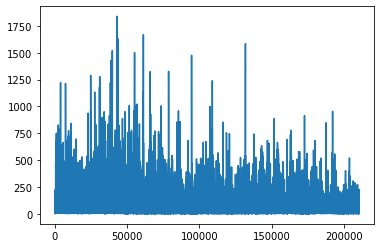

In [4]:
data = pd.read_excel('d1.xlsx')
data.columns = ['date', 'y']
data = data.dropna(subset=['y'])
#data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
data.y.plot()
n_out = 36

In [5]:
def prophet(data: pd.DataFrame) -> list:
    """
    get prediction by using fbprophet
    :param data:  Dataframe - data with two columns date and y
    :return: Dateframe - predict result
    """
    subset = pd.DataFrame({
        'ds': data.date,
        'y': data.y,
    })

    m = Prophet(
        daily_seasonality=True,
        weekly_seasonality=False,
        yearly_seasonality=False,
        growth='linear',
    )
    m.fit(subset)

    future = m.make_future_dataframe(periods=n_out, freq='H')

    forecast = m.predict(future)
    
    fig1 = m.plot(forecast)
    
    return forecast

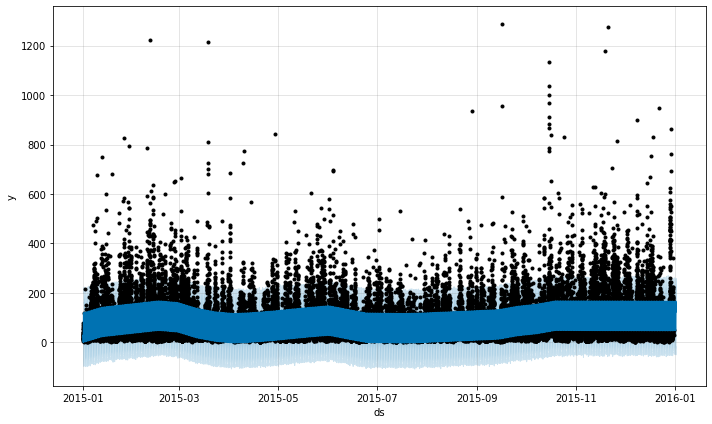

In [6]:
data = data[data.date < '20151231']
result = prophet(data)

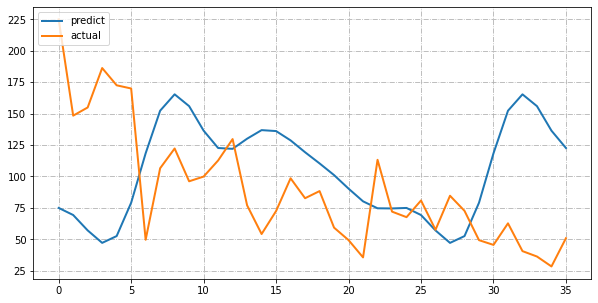

In [7]:
predict = result.tail(n_out).yhat.values
actual = data.tail(n_out).y.values
x = [x for x in range(n_out)]
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, predict, linewidth=2.0,label = "predict")
ax.plot(x, actual, linewidth=2.0,label = "actual")
ax.legend(loc=2);
plt.grid(linestyle='-.')
plt.show()

In [8]:
MSE = mean_squared_error(actual,predict)
RMSE = np.sqrt(MSE)
print('Test RMSE: %.3f' %RMSE)
MAE = mean_absolute_error(actual,predict)
print('Test MAE: %.3f' %MAE)

Test RMSE: 70.746
Test MAE: 58.268
